In [2]:
import numpy as np
import pandas as pd

### Dataset

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
```


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [3]:
!wget $data

--2024-10-07 23:52:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.02s   

2024-10-07 23:52:14 (11.9 MB/s) - ‘laptops.csv’ saved [298573/298573]



In [67]:
df=pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


### Preparing the dataset 

First, we'll normalize the names of the columns:

In [68]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [69]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [70]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [91]:
base = ['ram','storage','screen']

### EDA

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
%matplotlib inline

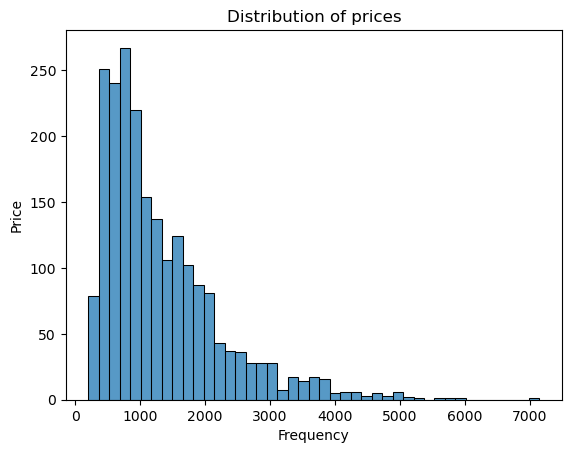

In [74]:
sns.histplot(df.final_price)
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.title("Distribution of prices")
plt.show()

The dataset doesn't have a long tail. So, we can work with the current dataset and there is no need to apply log1p.

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [75]:
df[base].isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [76]:
print("The column 'screen' has 4 missing values")

The column 'screen' has 4 missing values


### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [77]:
print(f"The median for the variable 'ram' is {df.ram.median():.0f}.")

The median for the variable 'ram' is 16.


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [78]:
n=len(df[base])

n_val=int(n*0.2)
n_test=int(n*0.2)
n_train = n- (n_test+n_val)

In [79]:
n, n_val+n_test+ n_train

(2160, 2160)

In [80]:
n_train, n_val, n_test

(1296, 432, 432)

In [81]:
idx=np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [82]:
np.random.seed(42) #To make the shuffling reproducible we assign a seed to the random function
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [83]:
df_shuffled = df[base].iloc[idx]
df_train=df_shuffled.iloc[:n_train].copy()
df_val=df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test=df_shuffled.iloc[n_train+n_val:].copy()

In [84]:
df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [85]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [86]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [87]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T@X
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [113]:
def prepare_X0(df):
    df_num = df[base]
    df_num = df_num.fillna(0) #Filling the missing values with zero
    X = df_num.values
    return X

In [114]:
X_train = prepare_X0(df_train)
X_val = prepare_X0(df_val)

In [115]:
def rmse(y, y_pred):
    se=(y- y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)

In [116]:
print("Training and calucaling the RMSE after filling missing values with 0.")
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)
score_train_0 = round(rmse(y_train, y_pred),2)
print(f"RMSE between y_train and y_pred: {score_train_0}")

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score_val_0 = round(rmse(y_val, y_pred),2)
print(f"RMSE between y_val and y_pred: {score_val_0}")

Training and calucaling the RMSE after filling missing values with 0.
RMSE between y_train and y_pred: 602.39
RMSE between y_val and y_pred: 597.36


In [117]:
def prepare_X_mean(df):
    df_num = df[base]
    #Filling the missing values with the mean of screen column from the training dataset
    df_num = df_num.fillna(df_train['screen'].mean()) 
    X = df_num.values
    return X

In [118]:
X_train = prepare_X_mean(df_train)
X_val = prepare_X_mean(df_val)

In [119]:
print("Training and calucaling the RMSE after filling missing values with mean of the training dataset.")
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)
score_train_mean = round(rmse(y_train, y_pred),2)
print(f"RMSE between y_train and y_pred: {score_train}")

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score_val_mean = round(rmse(y_val, y_pred),2)
print(f"RMSE between y_val and y_pred: {score_val}")

Training and calucaling the RMSE after filling missing values with mean of the training dataset.
RMSE between y_train and y_pred: 602.18
RMSE between y_val and y_pred: 597.74


In [125]:
print(f"The option with 0 gives a slightly better RMSE than the option with mean.\nThe difference between the two RMSE is RMSE_mean - RMSE_0 = {(score_val_mean-score_val_0):0.2f}.")

The option with 0 gives a slightly better RMSE than the option with mean.
The difference between the two RMSE is RMSE_mean - RMSE_0 = 0.38.


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [126]:
def train_linear_regression_reg(X,y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T@X
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [127]:
X_train = prepare_X0(df_train)
X_val = prepare_X0(df_val)

In [128]:
reg = [0, 0.01, 0.1, 1, 5, 10, 100]
for r in reg:
    w0, w = train_linear_regression_reg(X_train,y_train,r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score_val_0 = round(rmse(y_val, y_pred),2)
    print(f"Validation RMSE for r = {r}: {score_val_0}")

Validation RMSE for r = 0: 597.36
Validation RMSE for r = 0.01: 597.36
Validation RMSE for r = 0.1: 597.35
Validation RMSE for r = 1: 597.21
Validation RMSE for r = 5: 597.01
Validation RMSE for r = 10: 597.06
Validation RMSE for r = 100: 597.9


**`r = 10`** gives the best RMSE among the options.

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [135]:
base = ['ram','storage','screen', 'final_price']

In [136]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T@X
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [143]:
def prepare_X0(df):
    df_num = df.copy()
    df_num = df_num.fillna(0) #Filling the missing values with zero
    X = df_num.values
    return X

In [144]:
def rmse(y, y_pred):
    se=(y- y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)

In [145]:
def linear_regression(seed):
    n=len(df[base])
    n_val=int(n*0.2)
    n_test=int(n*0.2)
    n_train = n- (n_test+n_val)
    
    idx=np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_shuffled = df[base].iloc[idx].copy()
    df_train=df_shuffled.iloc[:n_train].copy()
    df_val=df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test=df_shuffled.iloc[n_train+n_val:].copy()
    
    df_train.reset_index(drop=True,inplace=True)
    df_val.reset_index(drop=True,inplace=True)
    df_test.reset_index(drop=True,inplace=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X0(df_train)
    w0, w = train_linear_regression(X_train,y_train)
    
    X_val = prepare_X0(df_val)
    y_pred = w0 + X_val.dot(w)
    score_val_0 = round(rmse(y_val, y_pred),2)
    return score_val_0

In [146]:
scores = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seeds:
    scores.append(linear_regression(seed))

In [147]:
scores

[565.45, 636.8, 588.96, 597.81, 571.96, 573.24, 647.34, 550.44, 587.33, 576.1]

In [149]:
print(f"The standard deviation of all the scores is {round(np.std(scores),3)}")

The standard deviation of all the scores is 29.176


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [151]:
def train_linear_regression_reg(X,y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T@X
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [160]:
def linear_regression(seed):
    n=len(df[base])
    n_val=int(n*0.2)
    n_test=int(n*0.2)
    n_train = n- (n_test+n_val)
    
    idx=np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_shuffled = df[base].iloc[idx].copy()
    df_train=df_shuffled.iloc[:n_train].copy()
    df_val=df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test=df_shuffled.iloc[n_train+n_val:].copy()
    
    df_train.reset_index(drop=True,inplace=True)
    df_val.reset_index(drop=True,inplace=True)
    df_test.reset_index(drop=True,inplace=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    df_full_train = pd.concat([df_train, df_val])
    X_full_train = prepare_X0(df_full_train)
    y_full_train = np.concatenate([y_train,y_val])
    w0, w = train_linear_regression_reg(X_full_train,y_full_train,0.001)
    
    X_test = prepare_X0(df_test)
    y_pred = w0 + X_test.dot(w)
    score_val_0 = round(rmse(y_test, y_pred),2)
    return score_val_0

In [161]:
score = linear_regression(9)
print(f"The RMSE on the test dataset is {score}")

The RMSE on the test dataset is 608.61


In [168]:
!pip install tzlocal

In [169]:
from datetime import datetime
import tzlocal

# Get the local timezone
local_timezone = tzlocal.get_localzone()

# Get the current time in the local timezone
current_time_local = datetime.now(local_timezone)

print(current_time_local)

2024-10-09 16:37:32.578262+05:30
